In [ ]:
import tensorflow as tf
import numpy as np # Import numpy for data generation
from sklearn.model_selection import train_test_split # Import for splitting data

from tensorflow.keras.models import Sequential
# Removed Conv2D and MaxPooling2D layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout

# Removed cifar10 dataset import
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the number of color classes (we will keep 10 to match CIFAR-10 output size)
NUM_CLASSES = 10

Load and Preprocess the CIFAR-10 Dataset

In [ ]:
# --- START OF COLOR CLASSIFICATION DATA GENERATION ---

# 1. Generate Synthetic Data
NUM_SAMPLES = 50000
np.random.seed(42) # for reproducible results

# Generate 50,000 random RGB vectors (3 features: R, G, B), normalized between 0 and 1
X = np.random.rand(NUM_SAMPLES, 3)

# 2. Generate Synthetic Labels (10 classes)
# We assign labels based on the value of the Red channel (X[:, 0]), creating 10 arbitrary color regions.
y = np.floor(X[:, 0] * NUM_CLASSES).astype(int)
y[y == NUM_CLASSES] = NUM_CLASSES - 1 # Handle the edge case (R=1.0)

# 3. Split the Data into Training and Testing sets
x_train, x_test, y_train_int, y_test_int = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Preprocessing: One-hot encode the labels
y_train = to_categorical(y_train_int, NUM_CLASSES)
y_test = to_categorical(y_test_int, NUM_CLASSES)

print(f"X_train shape (RGB input): {x_train.shape}")
print(f"y_train shape (One-Hot output): {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define abstract color labels for the 10 classes
color_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

X_train shape (RGB input): (40000, 3)
y_train shape (One-Hot output): (40000, 10)
X_test shape: (10000, 3)
y_test shape: (10000, 10)


Define the model

In [ ]:
# --- NEW DENSE NETWORK MODEL FOR COLOR CLASSIFICATION ---

model = Sequential([
    # The input layer expects a vector of size 3 (R, G, B).
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    # Output layer has 10 units for the 10 color classes, using softmax for probabilities
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4135 - loss: 1.4770 - val_accuracy: 0.9191 - val_loss: 0.4041
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8017 - loss: 0.4918 - val_accuracy: 0.9376 - val_loss: 0.2391
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.3630 - val_accuracy: 0.9639 - val_loss: 0.1734
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8712 - loss: 0.3100 - val_accuracy: 0.9633 - val_loss: 0.1590
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8848 - loss: 0.2796 - val_accuracy: 0.9510 - val_loss: 0.1639
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8870 - loss: 0.2695 - val_accuracy: 0.9229 - val_loss: 0.1667
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2480 - val_accuracy: 0.9579 - val_loss: 0.1276
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9065 - loss: 0.2274 - 

RGB values (normalized): [0.92865897 0.55234183 0.63195042]
One-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Abstract color label: Class 9


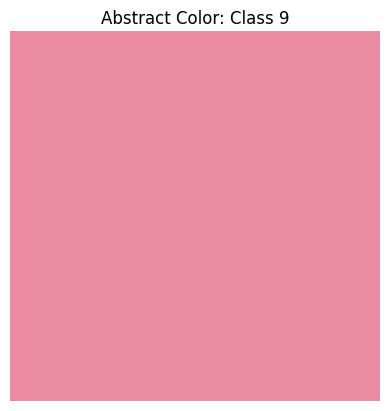

In [ ]:
# Let's view an example of the generated color data and its label
index = 0  # You can change this index
print(f"RGB values (normalized): {x_train[index]}")
print(f"One-hot label: {y_train[index]}")
print(f"Abstract color label: {color_labels[y_train[index].argmax()]}")

# To visualize a color, you can create a small image
# For example, create a 1x1 pixel image with the color
color_image = np.array([[x_train[index]]])

plt.imshow(color_image)
plt.title(f"Abstract Color: {color_labels[y_train[index].argmax()]}")
plt.axis('off') # Hide axes for a single color
plt.show()

Evaluate the model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')

313/313 - 0s - 1ms/step - accuracy: 0.9583 - loss: 0.1017
Test accuracy: 0.96


Visualize the model

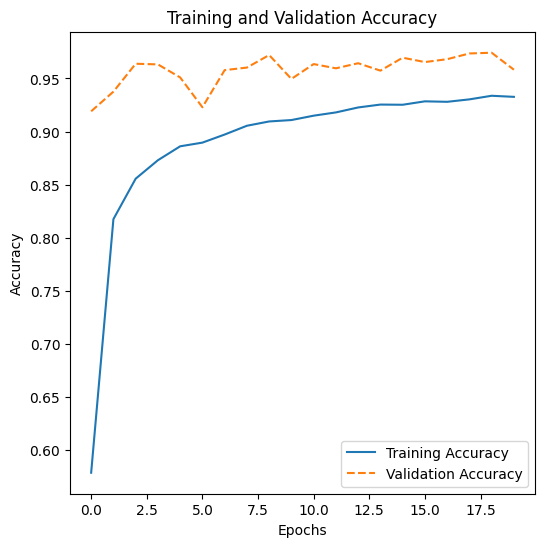

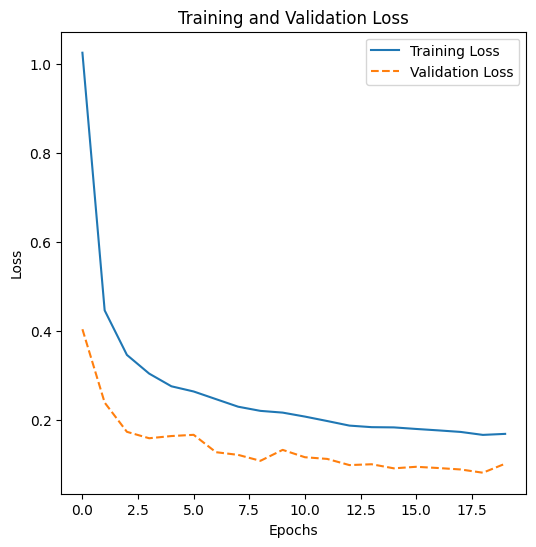

In [ ]:
# Convert the history to a DataFrame for easy visualization
import pandas as pd
history_df = pd.DataFrame(history.history)

# Plot training and validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], linestyle='--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(6, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], linestyle='--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# save the model
model.save('my_CNN_colors_cifar10_model.keras')

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_detections(img_path, results, model, show_coords=False):

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    ax = plt.gca()

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()   # [xmin, ymin, xmax, ymax]
        confs = r.boxes.conf.cpu().numpy()
        clss  = r.boxes.cls.cpu().numpy()

        for (xmin, ymin, xmax, ymax), conf, cls_id in zip(boxes, confs, clss):
            # Draw rectangle
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

            # Label
            cls_name = model.names[int(cls_id)]
            label = f"{cls_name} ({conf:.2f})"

            if show_coords:
                # Compute center pixel
                x_pixel = (xmin + xmax) / 2
                y_pixel = (ymin + ymax) / 2
                # Convert to meters
                # You would need a function to convert pixel to meter based on your setup
                # For example: X, Y = pixel_to_meter(x_pixel, y_pixel)
                # label += f"\nX={X:.2f}m, Y={Y:.2f}m"
                pass # Placeholder as pixel_to_meter is not defined


            # Add text
            plt.text(xmin, ymin - 5, label, color="yellow",
                     fontsize=9, backgroundcolor="black")

    plt.axis("off")
    plt.show()

show_detections("test_image.jpg", results, model, show_coords=True)

SyntaxError: invalid syntax (ipython-input-202725361.py, line 1)